In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

meses = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
df = pd.read_csv("obregon.txt",sep = "\s+")

In [124]:
df["FECHA"] = pd.to_datetime(df.FECHA)
df["MES"] = df["FECHA"].dt.month
df["AÑO"] = df["FECHA"].dt.year
df["TMED"] = (df["TMAX"]+df["TMIN"])/2

In [52]:
# obtener el promedio de lluvia acumulada durante todo el mes cada año
"""
suma todas las precipitaciones de todos los años por mes y lo divide entre el total de años
por ejemoplo: si tomamos a enero; suma todas las precipitaciones de enero de todos los años y lo divide entre el total de años;
en este caso el total de años es 22
"""
precips = []
suma = 0
for j in range(1,13):
    for i in range(0,len(df)):
        if(df["MES"][i] == j):
            suma = suma+ df["PRECIP"][i]
    suma = suma/22
    precips.append(suma)
    suma = 0

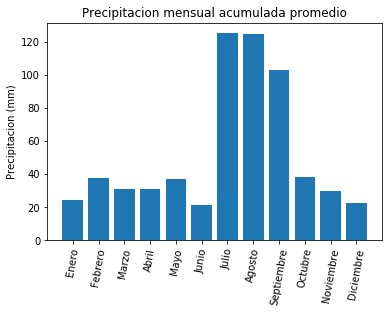

In [53]:
plt.bar(np.arange(12),precips)
plt.title("Precipitacion mensual acumulada promedio")
plt.ylabel("Precipitacion (mm)")
plt.xticks(np.arange(12), meses, rotation = 80)
plt.show()

In [54]:
## Obtiene la precipitacion acumulada anual de la misma manera que la anterior, solo que ahora como no es mensual no se divide entre el
## total de años.

prec_a = []
suma = 0
for j in range(1990,2012):
    for i in range(0,len(df)):
        if(df["AÑO"][i] == j):
            suma = suma+ df["PRECIP"][i]
    prec_a.append(suma)
    suma = 0

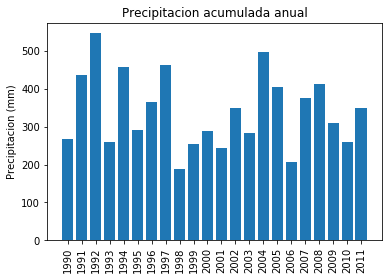

In [60]:
plt.bar(np.arange(22),prec_a)
plt.title("Precipitacion acumulada anual")
plt.ylabel("Precipitacion (mm)")
plt.xticks(np.arange(22), range(1990,2012), rotation = 90)
plt.show()

In [93]:
## Obtiene dos arrays con la temperatura promedio separada mensualmente durante los 22 años (Muy mal optimizado TARDA MUCHO)
tmax = []
n = 0
for i in range(1,13):
    for j in range(1990,2012):
        for k in range(0,len(df)):
            if(df["MES"][k] == i and df["AÑO"][k] == j):
                n = n+1
                suma = suma + df["TMAX"][k]
        suma = suma/n
        tmax.append(suma)
        suma = 0
        n = 0

tmin = []
n = 0
for i in range(1,13):
    for j in range(1990,2012):
        for k in range(0,len(df)):
            if(df["MES"][k] == i and df["AÑO"][k] == j):
                n = n+1
                suma = suma + df["TMIN"][k]
        suma = suma/n
        tmin.append(suma)
        suma = 0
        n = 0

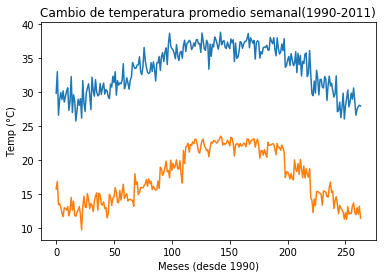

In [100]:
df1 = pd.DataFrame({"TMAX" : tmax,
                 "TMIN" : tmin
                    }, index = range(0,len(tmax))
    )

temps = df1[["TMAX","TMIN"]]
plt.plot(np.arange(len(tmin)),temps)
plt.title("Cambio de temperatura promedio semanal(1990-2011)")
plt.ylabel("Temp (°C)")
plt.xlabel("Meses (desde 1990)")
plt.show()

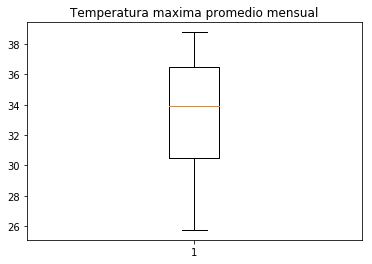

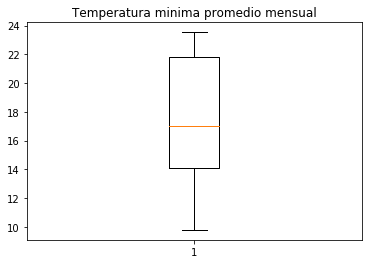

In [110]:
plt.boxplot(df1["TMAX"])
plt.title("Temperatura maxima promedio mensual")
plt.show()

plt.boxplot(df1["TMIN"])
plt.title("Temperatura minima promedio mensual")
plt.show()

In [123]:
tmed = []
temper = []
for j in range(1990,2012):
    for i in range(0,len(df)):
        if(df["AÑO"][i] == j):
            temper.append(df["TMED"][i])
    tmed.append(temper)
    temper = []

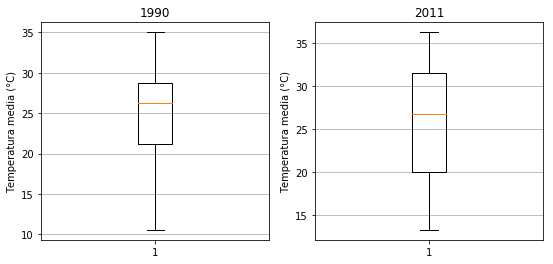

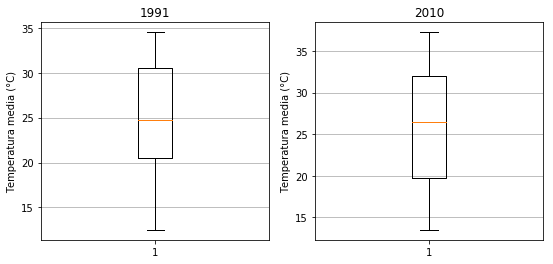

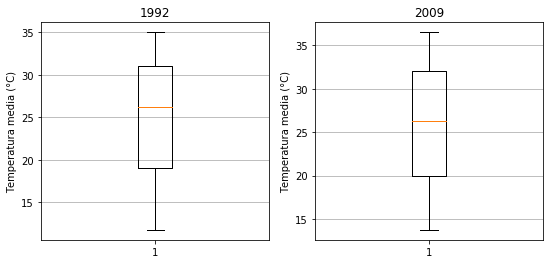

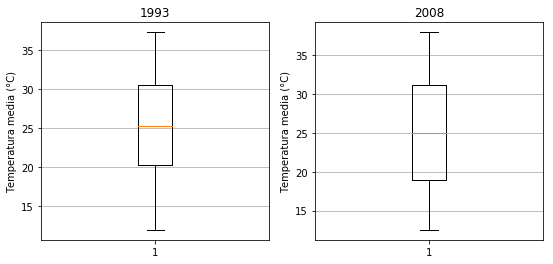

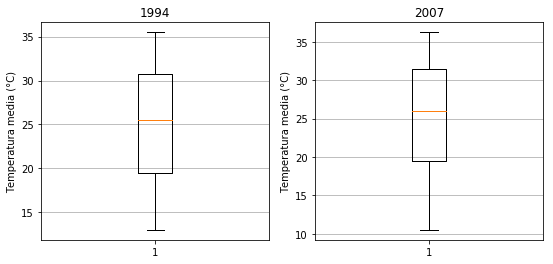

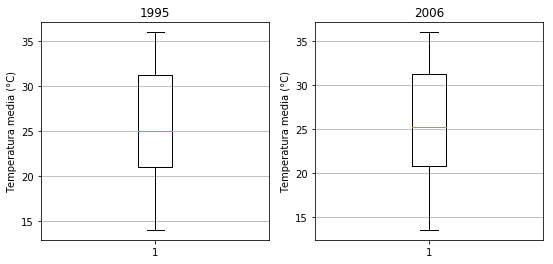

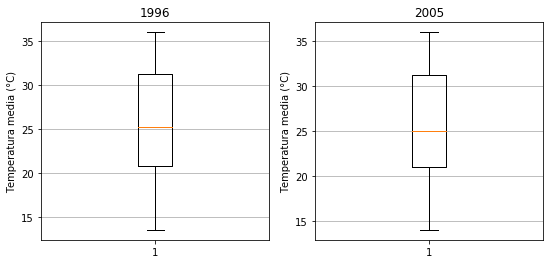

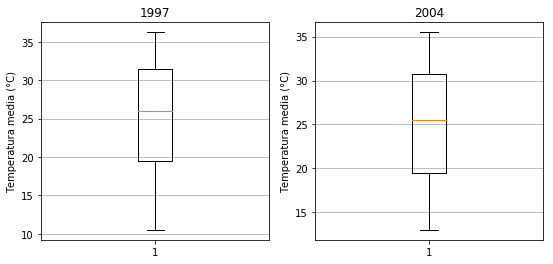

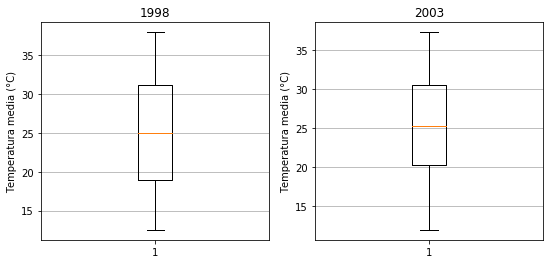

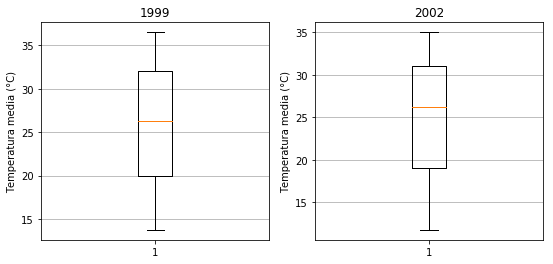

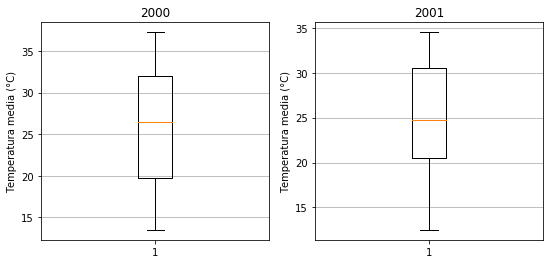

In [183]:
for i in range(1990,2001):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    axes[0].boxplot(tmed[i-1990])
    axes[0].set_title(i)
    axes[1].boxplot(tmed[2001-i])
    axes[1].set_title(4001-i)

    for ax in axes:
        ax.yaxis.grid(True)
        ax.set_ylabel('Temperatura media (°C)')
    plt.show()
